In [161]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import regularizers

RANDOM_SEED = 42

In [162]:
tf.keras.utils.set_random_seed(RANDOM_SEED)

In [163]:
def generate_net(start, step, elements):
    net = []
    for i in range(0, elements):
        net.append(start + step * i)
    for i in range(elements - 2, -1, -1):
        net.append(start + step * i)
    return net


def generate_nets(start, step, number_of_nets):
    nets = []
    for i in range(2, number_of_nets + 2):
        nets.append(generate_net(start, step, i))
    return nets


generate_nets(2, 2, 10)

In [164]:
# def generate_nets(n, step, offset=99):
#     nets = []
#     for i in range(2, n + 2):
#         net = []
#         for j in range(1, i + 1):
#             net.append(j + offset)
#         for j in range(i - 1, 0, -1):
#             net.append(j + offset)
#         nets.append(net)
#     return nets

In [165]:
def get_data():
    data = load_digits()

    X = data.data
    y = data.target
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(max(y) + 1))
    y = label_binarizer.transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

    return X_train, X_test, y_train, y_test

In [166]:
def compile_fit(net, X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(net[0], input_dim=X_train.shape[1], activation='relu'))
    for i in range(1, len(net)):
        model.add(Dense(net[i], activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [167]:
def plot_losses(loss, val_loss, neurons):
    figure = plt.figure(figsize=(10, 5))
    axes = figure.add_subplot(1, 1, 1)

    axes.plot(neurons, loss, label='loss', linestyle='--', color='#003B80')
    axes.plot(neurons, val_loss, label='val_loss', color='#003B80')

    axes.set_xlabel('neurons')
    axes.set_ylabel('loss')

    figure.legend()
    figure.tight_layout()

    return figure

In [180]:
def plot_epoch_losses(histories):
    figure = plt.figure(figsize=(25, 20))
    rows = len(histories) // 3 + 1

    for i in range(0, len(histories)):
        axes = figure.add_subplot(rows, 3, i + 1)
        axes.plot(histories[i].history['loss'], label='loss', linestyle='--', color='#003B80')
        axes.plot(histories[i].history['val_loss'], label='val_loss', color='#003B80')
        axes.set_title(f'Net {i + 1}')
        axes.set_xlabel('epochs')
        axes.set_ylabel('loss')
        axes.set_ylim(0, 10.1)
        axes.legend()

    figure.tight_layout()
    return figure

In [169]:
X_train, X_test, y_train, y_test = get_data()
sample_nets = generate_nets(8, 4, 5)

In [170]:
models_histories = []

for i in range(0, len(sample_nets)):
    models_histories.append(compile_fit(sample_nets[i], X_train, y_train, X_test, y_test)[1])

In [171]:
losses = [history.history['loss'][-1] for history in models_histories]
val_losses = [history.history['val_loss'][-1] for history in models_histories]
neurons = [sum(net) for net in sample_nets]

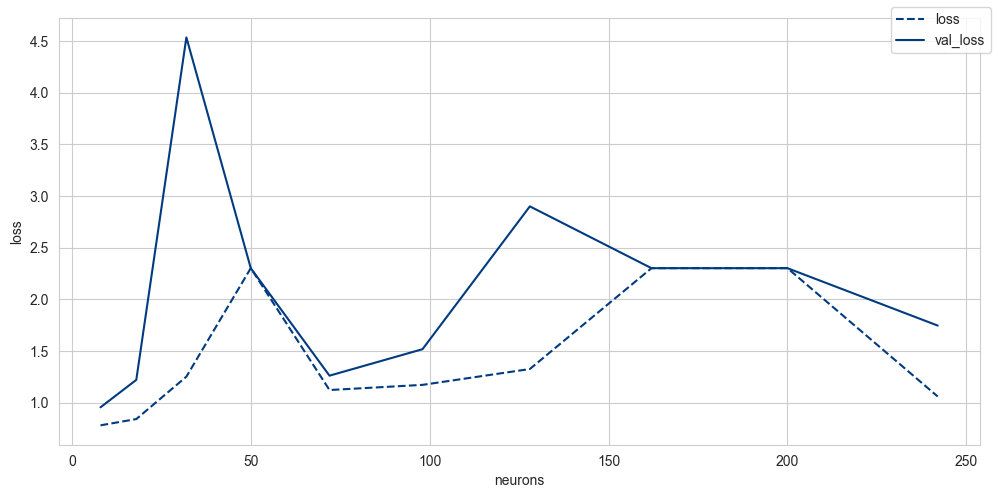

In [172]:
_ = plot_losses(losses, val_losses, neurons)

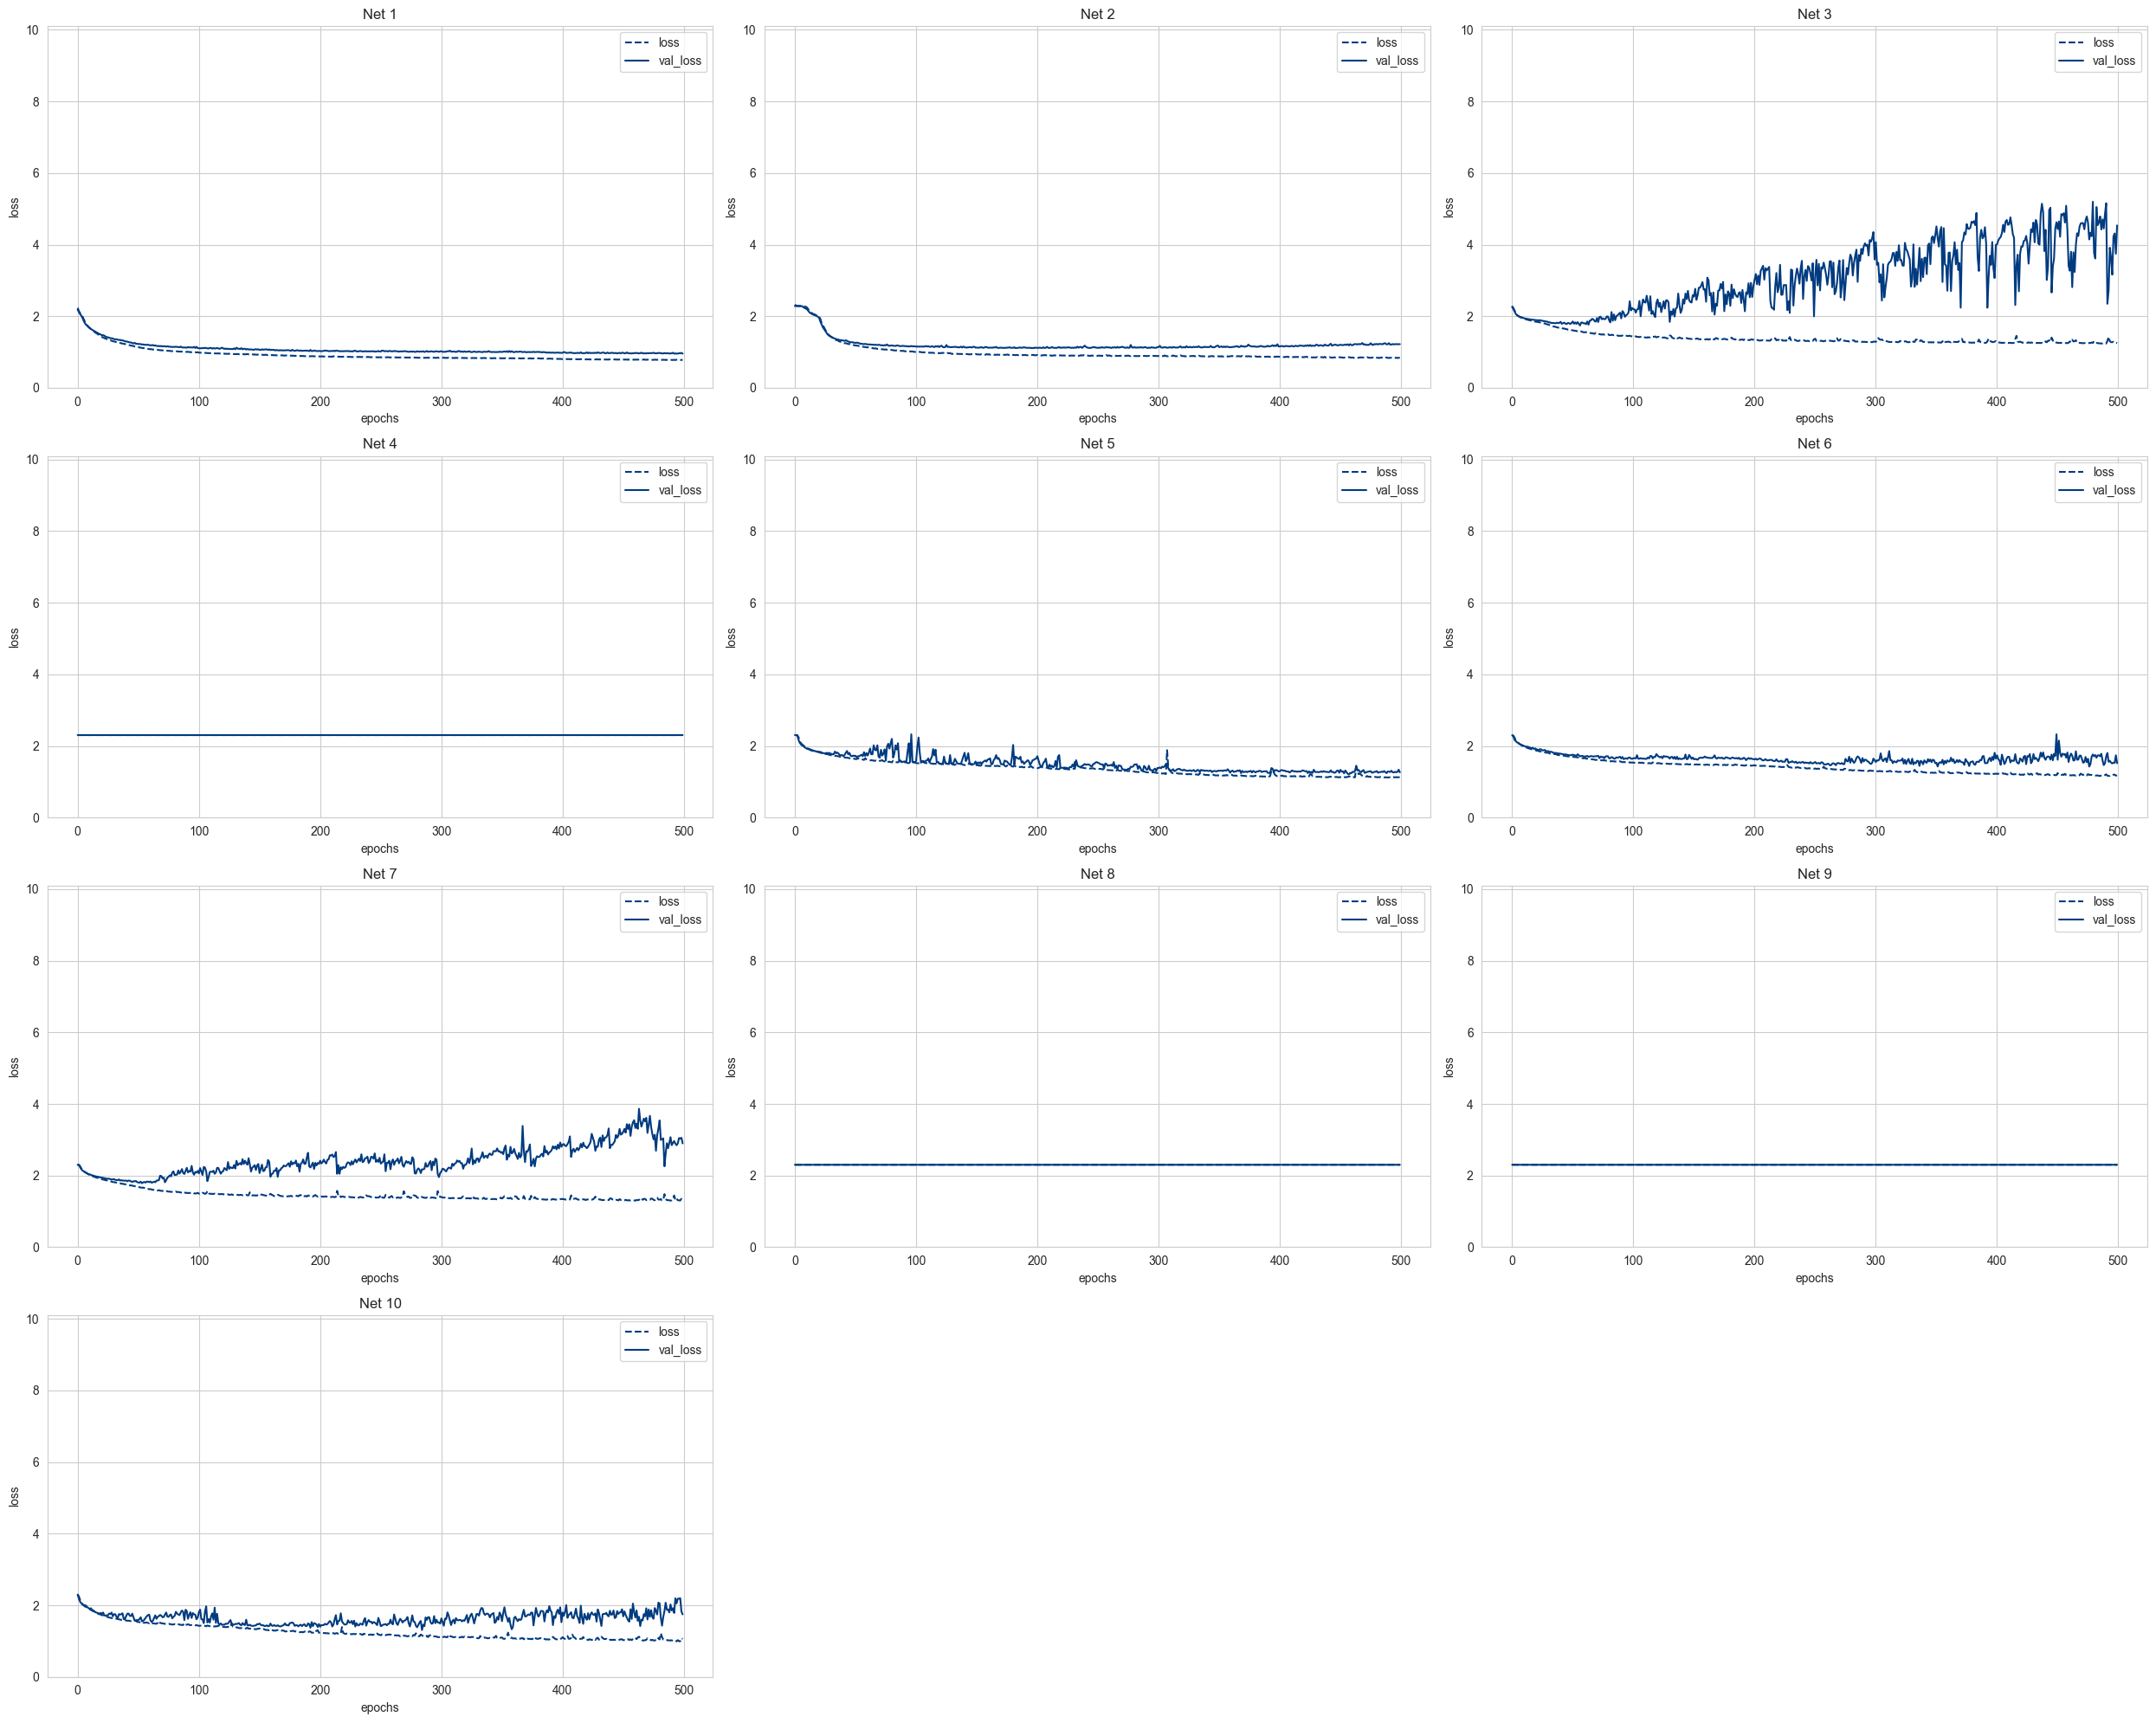

In [181]:
_ = plot_epoch_losses(models_histories)

In [174]:
sample_nets

[[2, 4, 2],
 [2, 4, 6, 4, 2],
 [2, 4, 6, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 14, 12, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 14, 16, 14, 12, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 16, 14, 12, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]]

In [175]:
neurons

[8, 18, 32, 50, 72, 98, 128, 162, 200, 242]

In [176]:
losses

[0.7811988592147827,
 0.8417255878448486,
 1.2524701356887817,
 2.3026559352874756,
 1.1228959560394287,
 1.1728873252868652,
 1.3262532949447632,
 2.3026559352874756,
 2.3026559352874756,
 1.060313105583191]

In [177]:
val_losses

[0.9557181596755981,
 1.2211616039276123,
 4.536693096160889,
 2.302506923675537,
 1.2619457244873047,
 1.5182693004608154,
 2.9007954597473145,
 2.302506923675537,
 2.302506923675537,
 1.7468141317367554]